In [76]:
#Importing some basic libarary 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [77]:
df1=pd.read_csv("/Users/bhaveshreddy/Downloads/Hyderabad_House_Data.csv")
df1.head()

,Unnamed: 0,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [78]:
#Number of rows and coloums
df1.shape

(1171, 8)

In [79]:
# Let us remove some coloums which are not needed for the process
df2=df1.drop(['Tennants','Unnamed: 0'],axis='columns')
df2.head()

,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality
0,3 BHK Builder Floor,2,Furnished,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,3 BHK Apartment,2,Semi-Furnished,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,1 BHK Builder Floor,Immediately,Furnished,read more,"18,000",Gachibowli
3,3 BHK Apartment,Immediately,Furnished,2160 sqft,"40,000","Moosapet, NH"
4,3 BHK Apartment,2,Semi-Furnished,1580 sqft,"23,000",Raghavendra Colony kondapur


In [80]:
#To where data is NA
df2.isnull().sum()

Bedrooms       0
Bathrooms     21
Furnishing     0
Area          22
Price          0
Locality       0
dtype: int64

In [81]:
#Let us drop them
df3=df2.dropna()
df3.isnull().sum()

Bedrooms      0
Bathrooms     0
Furnishing    0
Area          0
Price         0
Locality      0
dtype: int64

In [82]:
#Let us clean data set in this bedrooms let us see unique ones
df3['Bedrooms'].unique()

array(['3 BHK Builder Floor', '3 BHK Apartment', '1 BHK Builder Floor',
       '3 BHK Service Apartment', 'Studio Apartment', '2 BHK Apartment',
       '2 BHK Builder Floor', '2 BHK Service Apartment',
       '1 BHK Apartment', '4 BHK Apartment', '2 BHK Penthouse',
       '4 BHK Builder Floor', '5 BHK Apartment', '1 BHK Penthouse',
       '4 BHK Penthouse',
       '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t2 BHK Apartment\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t            \t',
       '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t3 BHK Builder Floor\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t            \t',
       '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t3 BHK Apartment\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t            \t',
       '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t3 BHK Service Apartment\t\t\t\t\t\t\t\

In [83]:
#As apartment, bhk everything is same
df3['bhk'] = df3['Bedrooms'].apply(lambda x: 1 if 'Studio' in x else int(x.split(' ')[0]))

/var/folders/hm/qcty8np56n39dwxpr1j176_80000gn/T/ipykernel_73073/2272032093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['Bedrooms'].apply(lambda x: 1 if 'Studio' in x else int(x.split(' ')[0]))


In [84]:
df3.head()

,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality,bhk
0,3 BHK Builder Floor,2,Furnished,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda",3
1,3 BHK Apartment,2,Semi-Furnished,2500 sqft,"45,000","Gachibowli, Outer Ring Road",3
2,1 BHK Builder Floor,Immediately,Furnished,read more,"18,000",Gachibowli,1
3,3 BHK Apartment,Immediately,Furnished,2160 sqft,"40,000","Moosapet, NH",3
4,3 BHK Apartment,2,Semi-Furnished,1580 sqft,"23,000",Raghavendra Colony kondapur,3


In [85]:
#Let us check if any wrong value
df3['bhk'].unique()

array([ 3,  1,  2,  4,  5, 10])

In [86]:
df3['Area'].unique() #checking if any mistakes in area 

array(['1800 sqft', '2500 sqft', 'read more', '2160 sqft', '1580 sqft',
       '2600 sqft', '1350 sqft', '1700 sqft', '1150 sqft', '1330 sqft',
       '1836 sqft', '1540 sqft', '1720 sqft', '1950 sqft', '2075 sqft',
       '1080 sqft', '1500 sqft', '2150 sqft', '1198 sqft', '2100 sqft',
       '1875 sqft', '1200 sqft', '1296 sqft', '1100 sqft', '2000 sqft',
       '2020 sqft', '1640 sqft', '1870 sqft', '1600 sqft', '1650 sqft',
       'East Facing Property', '1260 sqft', '1920 sqft', '1250 sqft',
       '1818 sqft', '2130 sqft', '1555 sqft', '2072 sqft', '1460 sqft',
       '1900 sqft', '950 sqft', '1563 sqft', '1990 sqft', '2051 sqft',
       '1075 sqft', '1360 sqft', '2025 sqft', '1860 sqft', '1160 sqft',
       '1400 sqft', '1380 sqft', '1620 sqft', '2200 sqft', '1810 sqft',
       '1510 sqft', '2800 sqft', '1908 sqft', '1705 sqft', '900 sqft',
       '1690 sqft', '800 sqft', '1230 sqft', '1050 sqft', '1265 sqft',
       '1550 sqft', '970 sqft', '1630 sqft', '1738 sqft', '1834 sqft'

In [87]:

df3['Area'] = df3['Area'].astype(str)  # Convert the Area column to string type
df3['Area'] = df3['Area'].str.extract(r'(\d+)').astype(float)  # Extract numeric part and convert to float

# Drop rows with NaN values in the Area column
df3 = df3.dropna(subset=['Area'])

df3


/var/folders/hm/qcty8np56n39dwxpr1j176_80000gn/T/ipykernel_73073/1017438147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Area'] = df3['Area'].astype(str)  # Convert the Area column to string type
/var/folders/hm/qcty8np56n39dwxpr1j176_80000gn/T/ipykernel_73073/1017438147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Area'] = df3['Area'].str.extract(r'(\d+)').astype(float)  # Extract numeric part and convert to float


,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality,bhk
0,3 BHK Builder Floor,2,Furnished,1800.0,"34,000","Bhagyalaxmi Nagar, Kavadiguda",3
1,3 BHK Apartment,2,Semi-Furnished,2500.0,"45,000","Gachibowli, Outer Ring Road",3
3,3 BHK Apartment,Immediately,Furnished,2160.0,"40,000","Moosapet, NH",3
4,3 BHK Apartment,2,Semi-Furnished,1580.0,"23,000",Raghavendra Colony kondapur,3
5,3 BHK Apartment,2,Furnished,2600.0,"50,000","Banjara Darwaja, Golconda Fort",3
...,...,...,...,...,...,...,...
1164,3 BHK Apartment,3,Semi-Furnished,1480.0,"34,000","Vertex Panache, Gachibowli, Outer Ring Road",3
1166,2 BHK Apartment,1,Unfurnished,900.0,"15,000",KPHB Road,2
1168,3 BHK Apartment,1,Unfurnished,1515.0,"14,000","Pragathi Nagar, Kukatpally",3
1169,3 BHK Apartment,From Nov '19,Family,1500.0,"16,000","Habsiguda, NH",3


In [88]:
# removing it for Bathrooms too
df3['Bathrooms'] = df3['Bathrooms'].astype(str)  # Convert the Area column to string type
df3['Bathrooms'] = df3['Bathrooms'].str.extract(r'(\d+)').astype(float)  # Extract numeric part and convert to float

# Drop rows with NaN values in the Area column
df3 = df3.dropna(subset=['Bathrooms'])

df3

,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality,bhk
0,3 BHK Builder Floor,2.0,Furnished,1800.0,"34,000","Bhagyalaxmi Nagar, Kavadiguda",3
1,3 BHK Apartment,2.0,Semi-Furnished,2500.0,"45,000","Gachibowli, Outer Ring Road",3
4,3 BHK Apartment,2.0,Semi-Furnished,1580.0,"23,000",Raghavendra Colony kondapur,3
5,3 BHK Apartment,2.0,Furnished,2600.0,"50,000","Banjara Darwaja, Golconda Fort",3
6,3 BHK Service Apartment,1.0,Semi-Furnished,1350.0,"32,000","Mohans Sai Signature, Nanakramguda",3
...,...,...,...,...,...,...,...
1164,3 BHK Apartment,3.0,Semi-Furnished,1480.0,"34,000","Vertex Panache, Gachibowli, Outer Ring Road",3
1166,2 BHK Apartment,1.0,Unfurnished,900.0,"15,000",KPHB Road,2
1168,3 BHK Apartment,1.0,Unfurnished,1515.0,"14,000","Pragathi Nagar, Kukatpally",3
1169,3 BHK Apartment,19.0,Family,1500.0,"16,000","Habsiguda, NH",3


In [89]:
df3['Bathrooms'].unique()

array([ 2.,  1.,  3.,  4., 19.,  5.])

In [90]:
df3 = df3[df3['Bathrooms'] != 19]
df3

,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality,bhk
0,3 BHK Builder Floor,2.0,Furnished,1800.0,"34,000","Bhagyalaxmi Nagar, Kavadiguda",3
1,3 BHK Apartment,2.0,Semi-Furnished,2500.0,"45,000","Gachibowli, Outer Ring Road",3
4,3 BHK Apartment,2.0,Semi-Furnished,1580.0,"23,000",Raghavendra Colony kondapur,3
5,3 BHK Apartment,2.0,Furnished,2600.0,"50,000","Banjara Darwaja, Golconda Fort",3
6,3 BHK Service Apartment,1.0,Semi-Furnished,1350.0,"32,000","Mohans Sai Signature, Nanakramguda",3
...,...,...,...,...,...,...,...
1163,2 BHK Apartment,1.0,Semi-Furnished,1200.0,"20,000","Lingampally-Serilingampally, NH",2
1164,3 BHK Apartment,3.0,Semi-Furnished,1480.0,"34,000","Vertex Panache, Gachibowli, Outer Ring Road",3
1166,2 BHK Apartment,1.0,Unfurnished,900.0,"15,000",KPHB Road,2
1168,3 BHK Apartment,1.0,Unfurnished,1515.0,"14,000","Pragathi Nagar, Kukatpally",3


In [91]:
df3['Price'] = df3['Price'].str.replace(',', '').astype(float)
df4=df3.copy()
df4['Price per sqaure feet']=df4['Price']/df4['Area']
df4.head()

/var/folders/hm/qcty8np56n39dwxpr1j176_80000gn/T/ipykernel_73073/1714442906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Price'] = df3['Price'].str.replace(',', '').astype(float)


,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality,bhk,Price per sqaure feet
0,3 BHK Builder Floor,2.0,Furnished,1800.0,34000.0,"Bhagyalaxmi Nagar, Kavadiguda",3,18.888889
1,3 BHK Apartment,2.0,Semi-Furnished,2500.0,45000.0,"Gachibowli, Outer Ring Road",3,18.000000
4,3 BHK Apartment,2.0,Semi-Furnished,1580.0,23000.0,Raghavendra Colony kondapur,3,14.556962
5,3 BHK Apartment,2.0,Furnished,2600.0,50000.0,"Banjara Darwaja, Golconda Fort",3,19.230769
6,3 BHK Service Apartment,1.0,Semi-Furnished,1350.0,32000.0,"Mohans Sai Signature, Nanakramguda",3,23.703704


In [92]:
len(df4.Locality.unique())

473

In [93]:
df4.Locality= df4.Locality.apply(lambda x: x.strip())
location_stats=df4.groupby('Locality')['Locality'].agg('count').sort_values(ascending=False)
location_stats

Locality
Attapur                                                          17
My Home Avatar, Narsingi, Outer Ring Road                        14
Manikonda, Outer Ring Road                                       13
Kondapur                                                         12
Banjara Hills, NH                                                12
                                                                 ..
Lacasa K Apartments, Banjara Hills, NH                            1
LIG Apartments, Kukatpally, NH                                    1
L&T Serene County, Telecom Nagar, Gachibowli, Outer Ring Road     1
L&T Serene County, Gachibowli, Outer Ring Road                    1
military dairy farm rd                                            1
Name: Locality, Length: 444, dtype: int64

In [94]:
len(location_stats[location_stats<=1])

302

In [95]:
#LET US CONSIDER 1 room as atleast 350Square feet
df4[df4.Area/df4.bhk<350].head()


,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality,bhk,Price per sqaure feet
172,3 BHK Apartment,2.0,Semi-Furnished,1000.0,18500.0,Mayur Marg,3,18.500000
197,2 BHK Apartment,1.0,Unfurnished,150.0,12500.0,"Sun City, Bandlaguda, Chevella Road",2,83.333333
257,2 BHK Apartment,1.0,Unfurnished,670.0,10500.0,"Quthbullapur, NH",2,15.671642
269,2 BHK Apartment,1.0,Semi-Furnished,100.0,9000.0,Narapally,2,90.000000
385,3 BHK Apartment,3.0,Semi-Furnished,1024.0,30000.0,"Aditya Imperial Heights, Hafeezpet, NH",3,29.296875


In [96]:
# let us remove them
df5=df4[~(df4.Area/df4.bhk<350)]

In [97]:
df5.rename(columns={
    'Price per sqaure feet': 'Price_per_sqft'
}, inplace=True)

# Display the first few rows to verify the changes
df5.head()


/var/folders/hm/qcty8np56n39dwxpr1j176_80000gn/T/ipykernel_73073/1146095147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns={


,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality,bhk,Price_per_sqft
0,3 BHK Builder Floor,2.0,Furnished,1800.0,34000.0,"Bhagyalaxmi Nagar, Kavadiguda",3,18.888889
1,3 BHK Apartment,2.0,Semi-Furnished,2500.0,45000.0,"Gachibowli, Outer Ring Road",3,18.000000
4,3 BHK Apartment,2.0,Semi-Furnished,1580.0,23000.0,Raghavendra Colony kondapur,3,14.556962
5,3 BHK Apartment,2.0,Furnished,2600.0,50000.0,"Banjara Darwaja, Golconda Fort",3,19.230769
6,3 BHK Service Apartment,1.0,Semi-Furnished,1350.0,32000.0,"Mohans Sai Signature, Nanakramguda",3,23.703704


In [98]:
df5.Price_per_sqft.describe()

count    777.000000
mean      15.822660
std        5.747716
min        2.833333
25%       11.627907
50%       15.000000
75%       18.947368
max       41.984733
Name: Price_per_sqft, dtype: float64

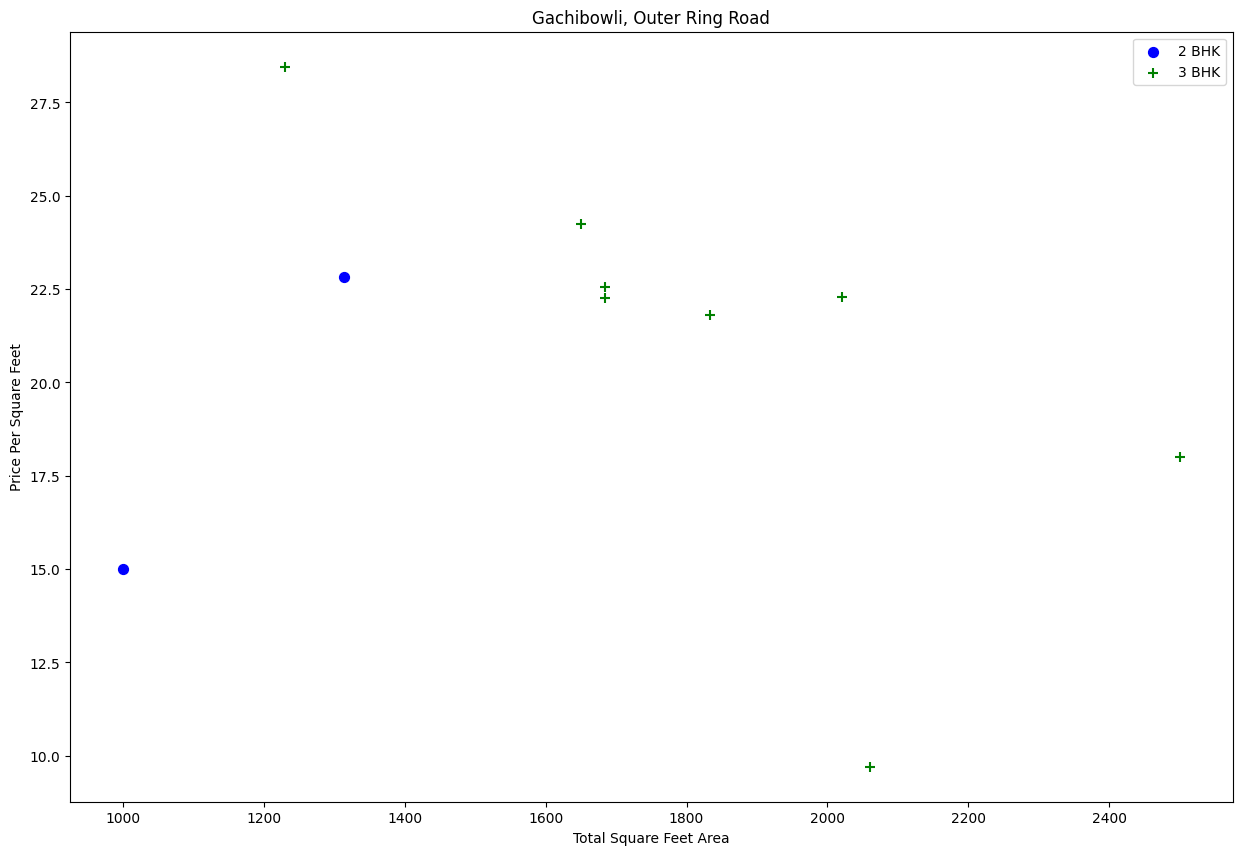

In [99]:
import matplotlib.pyplot as plt
import matplotlib

def plot_scatter_chart(df, location):
    bhk2 = df[(df['Locality'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['Locality'] == location) & (df['bhk'] == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2['Area'], bhk2['Price_per_sqft'], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['Area'], bhk3['Price_per_sqft'], marker='+', color='green', label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

# Call the function with your DataFrame and location
plot_scatter_chart(df5, "Gachibowli, Outer Ring Road")


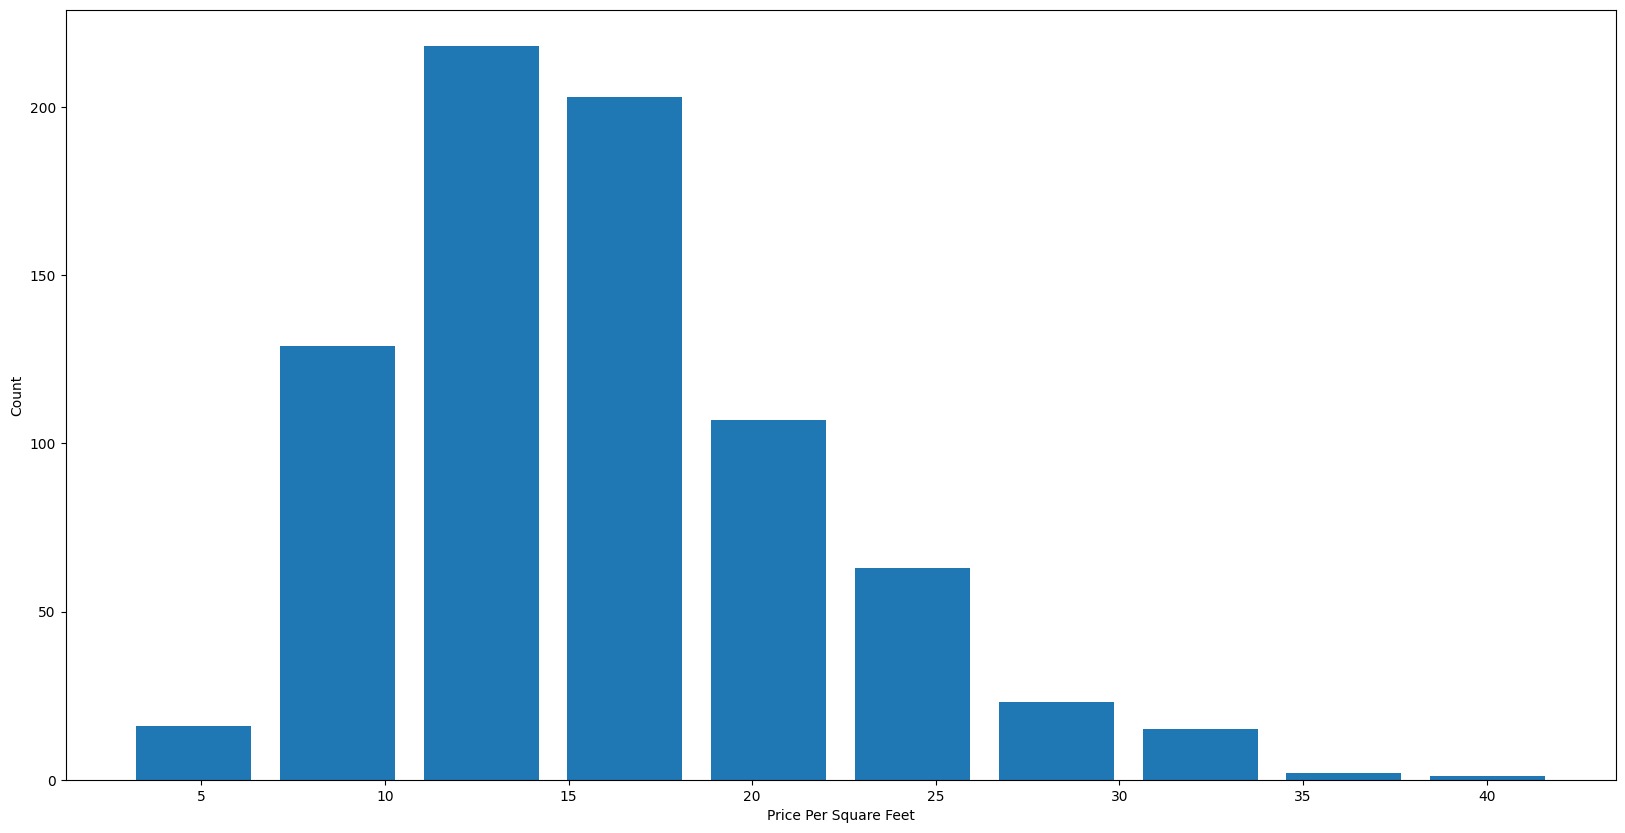

In [100]:

# Set the size of the plot
matplotlib.rcParams["figure.figsize"] = (20, 10)

# Create a histogram for the 'Price_per_sqft' column
plt.hist(df5['Price_per_sqft'], rwidth=0.8)

# Label the axes
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Display the plot
plt.show()


In [101]:
# As cleaning is done let us drop things not important
df5

,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality,bhk,Price_per_sqft
0,3 BHK Builder Floor,2.0,Furnished,1800.0,34000.0,"Bhagyalaxmi Nagar, Kavadiguda",3,18.888889
1,3 BHK Apartment,2.0,Semi-Furnished,2500.0,45000.0,"Gachibowli, Outer Ring Road",3,18.000000
4,3 BHK Apartment,2.0,Semi-Furnished,1580.0,23000.0,Raghavendra Colony kondapur,3,14.556962
5,3 BHK Apartment,2.0,Furnished,2600.0,50000.0,"Banjara Darwaja, Golconda Fort",3,19.230769
6,3 BHK Service Apartment,1.0,Semi-Furnished,1350.0,32000.0,"Mohans Sai Signature, Nanakramguda",3,23.703704
...,...,...,...,...,...,...,...,...
1163,2 BHK Apartment,1.0,Semi-Furnished,1200.0,20000.0,"Lingampally-Serilingampally, NH",2,16.666667
1164,3 BHK Apartment,3.0,Semi-Furnished,1480.0,34000.0,"Vertex Panache, Gachibowli, Outer Ring Road",3,22.972973
1166,2 BHK Apartment,1.0,Unfurnished,900.0,15000.0,KPHB Road,2,16.666667
1168,3 BHK Apartment,1.0,Unfurnished,1515.0,14000.0,"Pragathi Nagar, Kukatpally",3,9.240924


In [102]:
df6=df5.drop(['Bedrooms','Price_per_sqft'],axis='columns')
df6.head(3)

,Bathrooms,Furnishing,Area,Price,Locality,bhk
0,2.0,Furnished,1800.0,34000.0,"Bhagyalaxmi Nagar, Kavadiguda",3
1,2.0,Semi-Furnished,2500.0,45000.0,"Gachibowli, Outer Ring Road",3
4,2.0,Semi-Furnished,1580.0,23000.0,Raghavendra Colony kondapur,3


In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [105]:
X = df6[['Furnishing', 'bhk', 'Area', 'Bathrooms', 'Locality']]
y = df6['Price']

# Convert categorical data to numeric
X = pd.get_dummies(X, drop_first=True)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
#LINEAR REGRESSION
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)



In [108]:
#Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


In [109]:
#Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


In [110]:
print("Linear Regression: MAE =", mae_lr, ", R2 =", r2_lr)
print("Lasso Regression: MAE =", mae_lasso, ", R2 =", r2_lasso)
print("Decision Tree: MAE =", mae_tree, ", R2 =", r2_tree)


Linear Regression: MAE = 140289699465.6883 , R2 = -1.3503628874433212e+16
Lasso Regression: MAE = 5525.157426298235 , R2 = 0.558882565268128
Decision Tree: MAE = 6544.871794871795 , R2 = 0.27576643963643355


In [112]:
X = df6[['Furnishing', 'bhk', 'Area', 'Bathrooms', 'Locality']]
y = df6['Price']

# Convert categorical data to numeric
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Lasso model
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression: MAE =", mae_lasso, ", R2 =", r2_lasso)

# Predicting new data (example)
new_data = pd.DataFrame({
    'Furnishing': ['Furnished'],
    'bhk': [2],
    'Area': [1200.0],
    'Bathrooms': [1.0],
    'Locality': ['Gachibowli, Outer Ring Road']
})

# Convert new data to numeric
new_data = pd.get_dummies(new_data, drop_first=True)
new_data = new_data.reindex(columns=X.columns, fill_value=0)  # Align columns with the training data

# Predict price for new data
predicted_price = lasso_reg.predict(new_data)
print("Predicted Price for new data:", predicted_price)

Lasso Regression: MAE = 5525.157426298235 , R2 = 0.558882565268128
Predicted Price for new data: [16212.43103258]


In [113]:
# Predicting new data (example)
new_data = pd.DataFrame({
    'Furnishing': ['Furnished'],
    'bhk': [2],
    'Area': [2200.0],
    'Bathrooms': [1.0],
    'Locality': ['Gachibowli']
})

# Convert new data to numeric
new_data = pd.get_dummies(new_data, drop_first=True)
new_data = new_data.reindex(columns=X.columns, fill_value=0)  # Align columns with the training data

# Predict price for new data
predicted_price = lasso_reg.predict(new_data)
print("Predicted Price for new data:", predicted_price)

Predicted Price for new data: [21370.82192175]
